# complete EDA
## We are using the dataset of google playstore

# About Dataset
> Context
>While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

>Content
>Each app (row) has values for catergory, rating, size, and more.

>Acknowledgements
>> This information is scraped from the Google Play Store. This app information would not be available without it.

>Inspiration
>The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline 

2. Data Loading and exploration and cleaning
   
↪ Load the csv file with the pandas

↪ creating the dataframe and understanding the data present in the dataset using pandas

↪ Dealing with the missing data, outliers and the incorrect records

In [2]:

df = pd.read_csv("new_google_playstore_data.csv")


> Viewing the first five Rows of the data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs(+),Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> *Note*: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe


> ***Working in interactive environments:*** In interactive environments like Jupyter Notebooks or interactive Python shells, you might choose to suppress warnings to maintain a cleaner and more focused workflow.

In [5]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

> let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(MB)', 'Installs(+)',
       'Type', 'Price($)', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

> Let's have a look on the shape of the datase

In [7]:
df.shape

(10841, 13)

> Not enough, let's have a look on the columns and their data types using detailed info function

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size(MB)        9146 non-null   float64
 5   Installs(+)     10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price($)        10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# observation

1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
* 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',   'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',   'Android Ver'
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
 there are some columns such as size installs and price they were in datatype object we have changed them in to this [notebook](EDA(06)_making%20the%20data%20understandable%20for%20analysis.ipynb)


> now to check stats of the data

In [9]:
df.describe()

,Rating,Reviews,Size(MB),Installs(+),Price($)
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# observations

* Now, we have only 6 columns as numeric data type.
* We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
* We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
* We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.
- Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

# But even before that we have to think about the missing values in the dataset

# 2.2  2.2. Dealing with the missing values
- Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

- Where to Learn more about Missing Values?
In the following blog Missing Values k [blog](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

> Let's have a look on the missing values in the dataset

In [10]:
df.isnull().sum() # this will show the number of null values in each column

App                  0
Category             1
Rating            1474
Reviews              0
Size(MB)          1695
Installs(+)          0
Type                 1
Price($)             0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

> using sort_values function

In [11]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size(MB)          1695
Rating            1474
Current Ver          8
Android Ver          3
Category             1
Type                 1
App                  0
Reviews              0
Installs(+)          0
Price($)             0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [12]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

3182

> checking the percentage of missing values in each column 

In [13]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size(MB)          15.635089
Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Category           0.009224
Type               0.009224
App                0.000000
Reviews            0.000000
Installs(+)        0.000000
Price($)           0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

> Let's plot the missing values in the dataset

<Axes: >

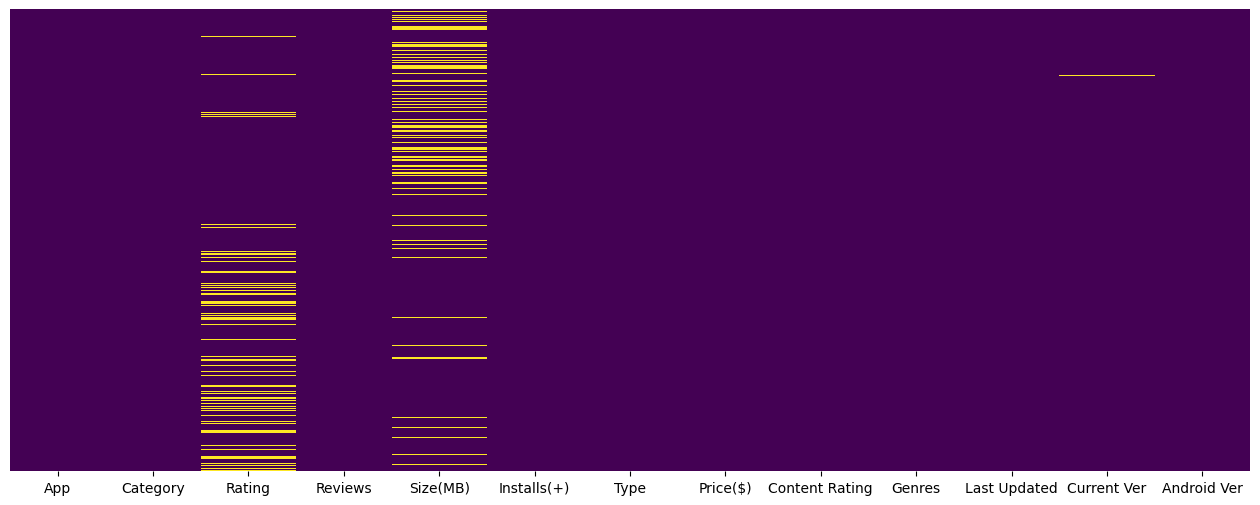

In [14]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

> There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

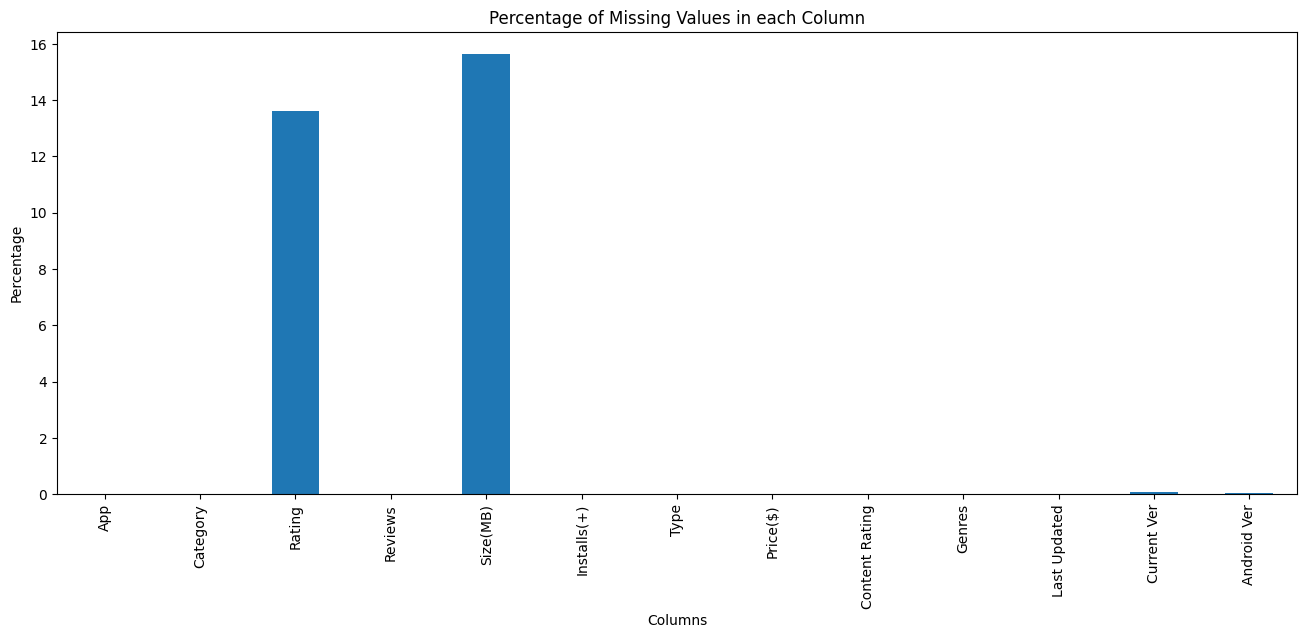

In [15]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

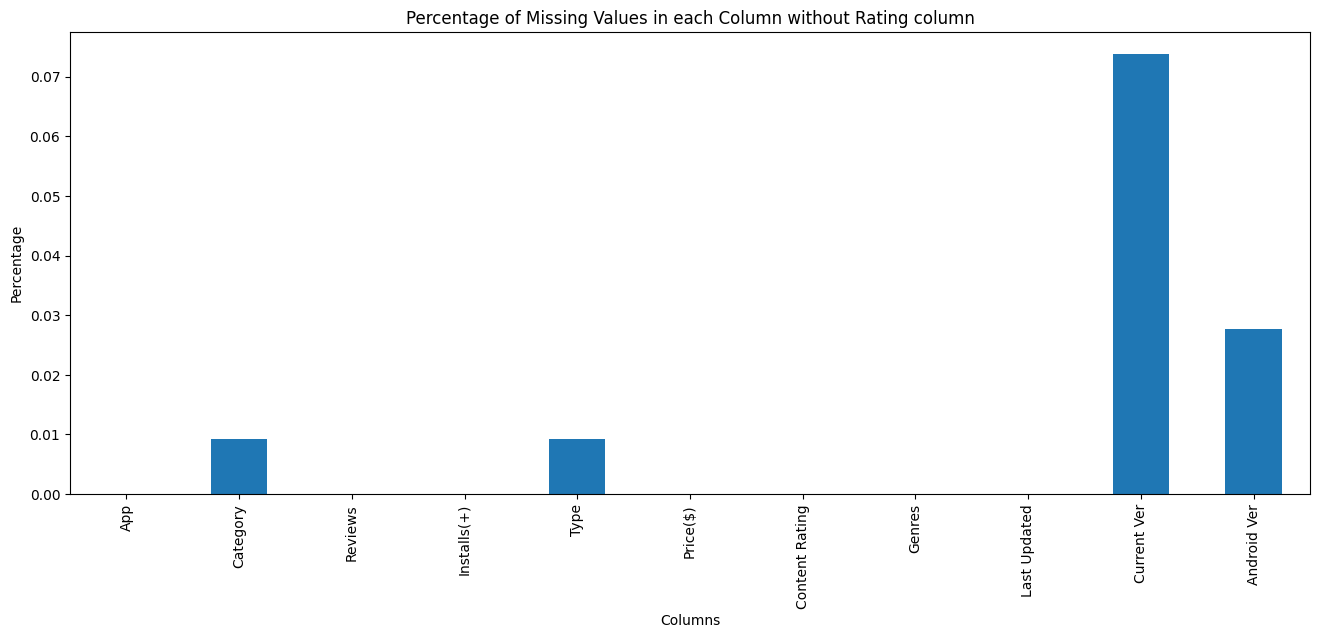

In [16]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

In [17]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size(MB)          1695
Rating            1474
Current Ver          8
Android Ver          3
Category             1
Type                 1
App                  0
Reviews              0
Installs(+)          0
Price($)             0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [18]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size(MB)          15.635089
Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Category           0.009224
Type               0.009224
App                0.000000
Reviews            0.000000
Installs(+)        0.000000
Price($)           0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

# observation
- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.
## 2.3. Dealing with the missing values
- We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.
> Let's run the correlations

In [19]:
df.describe() # these are numeric columns

,Rating,Reviews,Size(MB),Installs(+),Price($)
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


<Axes: >

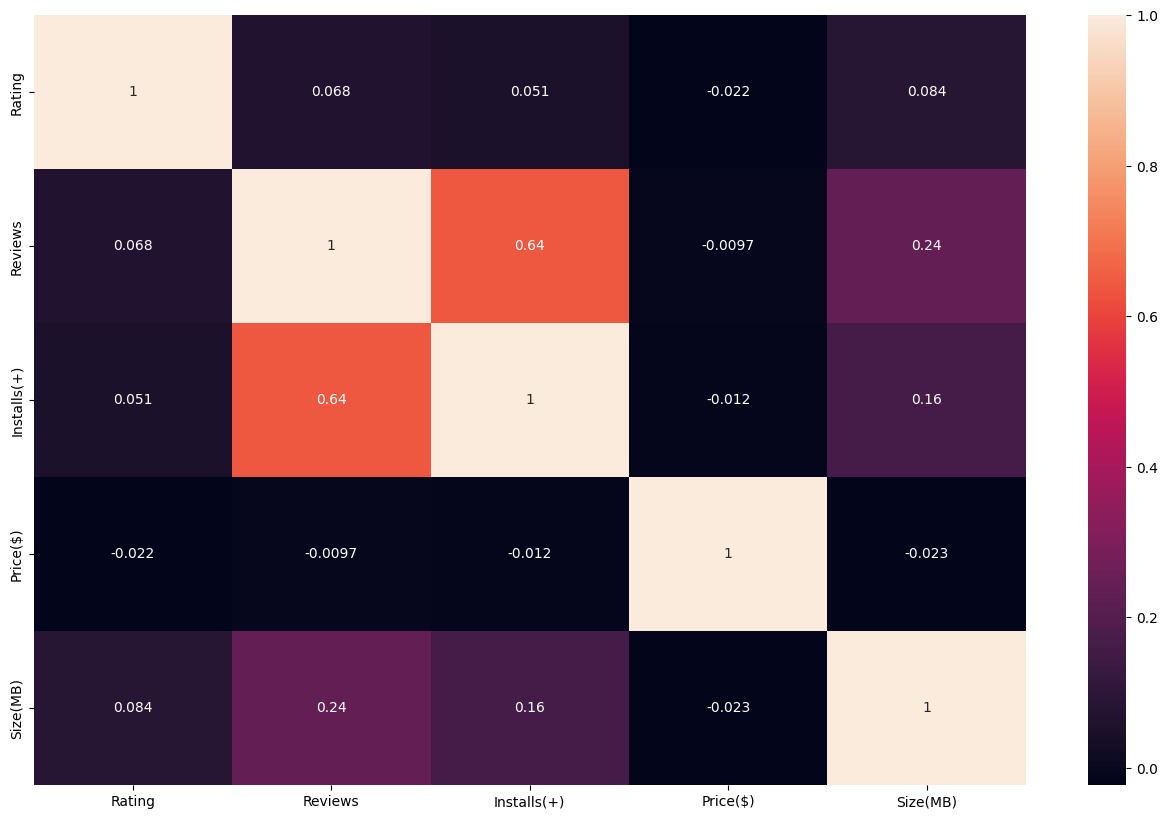

In [20]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews',  'Installs(+)', 'Price($)', 'Size(MB)'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [21]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Installs(+),Price($),Size(MB)
Rating,1.000000,0.068147,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.643123,-0.009666,0.238218
Installs(+),0.051393,0.643123,1.000000,-0.011688,0.164794
Price($),-0.021851,-0.009666,-0.011688,1.000000,-0.023000
Size(MB),0.084098,0.238218,0.164794,-0.023000,1.000000


In [23]:
pip install scipy 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs(+)'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


# Observations

1.  Lighter color shows the high correlation and darker color shows the low correlation
2. We can see that the Reviews column has a high correlation with the Installs column, which is 0.64 according to corr(). Which is quite good.

    * This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.

        * If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
> Installs is slightly correlated with Size(MB), which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.

* Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis

In [26]:
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [27]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [28]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


> We have removed 12 rows having null values in the Current Ver, Android Ver, Category, Type and Genres columns.

In [29]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size(MB)          1694
Rating            1469
App                  0
Category             0
Reviews              0
Installs(+)          0
Type                 0
Price($)             0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

# Observations
1. Only Rating and Size_in_bytes or Size_in_Mb columns are left with missing values.
   1. We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
   2. In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.


In [30]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(MB)', 'Installs(+)',
       'Type', 'Price($)', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [32]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs(+)')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs(+),,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,5.000000,0.000000,5.0,5.00,5.0,5.000,5.0
5,9.0,4.611111,1.166667,1.5,5.00,5.0,5.000,5.0
10,69.0,4.624638,0.821119,1.0,4.80,5.0,5.000,5.0
50,56.0,4.419643,1.046799,1.0,4.35,5.0,5.000,5.0
100,309.0,4.363430,0.847641,1.0,4.00,4.7,5.000,5.0
500,201.0,4.176617,0.801873,1.0,3.90,4.4,4.700,5.0
1000,712.0,4.066292,0.784476,1.0,3.70,4.3,4.600,5.0
5000,431.0,4.026450,0.636302,1.4,3.70,4.2,4.500,5.0


# removing missing values of rating  column

In [33]:
df['Rating'].isnull().sum()

1469

In [35]:
# in which Install_category the Rating has NaN values
df['Installs(+)'].loc[df['Rating'].isnull()].value_counts().sort_values

<bound method Series.sort_values of Installs(+)
100        409
10         316
1000       193
50         149
500        129
5           73
1           64
5000        45
10000       43
100000      19
0           14
50000       12
1000000      2
500000       1
Name: count, dtype: int64>

Text(7, 3.5, 'Null values: 1')

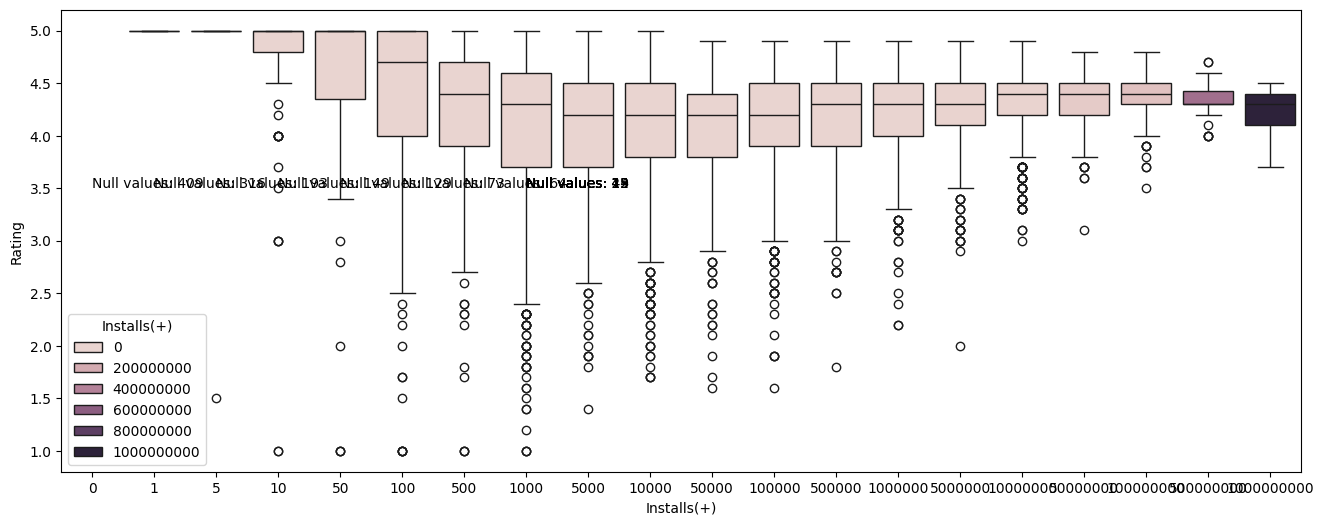

In [40]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs(+)', y='Rating', hue='Installs(+)', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 409')
plt.text(1, 3.5, 'Null values: 316')
plt.text(2, 3.5, 'Null values: 193')
plt.text(3, 3.5, 'Null values: 149')
plt.text(4, 3.5, 'Null values: 129')
plt.text(5, 3.5, 'Null values: 73')
plt.text(6, 3.5, 'Null values: 64')
plt.text(7, 3.5, 'Null values: 45')
plt.text(7, 3.5, 'Null values: 43')
plt.text(7, 3.5, 'Null values: 19')
plt.text(7, 3.5, 'Null values: 14')
plt.text(7, 3.5, 'Null values: 12')
plt.text(7, 3.5, 'Null values: 2')
plt.text(7, 3.5, 'Null values: 1')

> Let's check if there is any similar link with Reviews as well

In [43]:
# in which Install_category the Rating has NaN values
df['Installs(+)'].loc[df['Reviews'].isnull()].value_counts()

Series([], Name: count, dtype: int64)

In [47]:
df['Reviews'].isnull().sum()

0

> There are no Null values in Reviews

<Axes: xlabel='Installs(+)', ylabel='Reviews'>

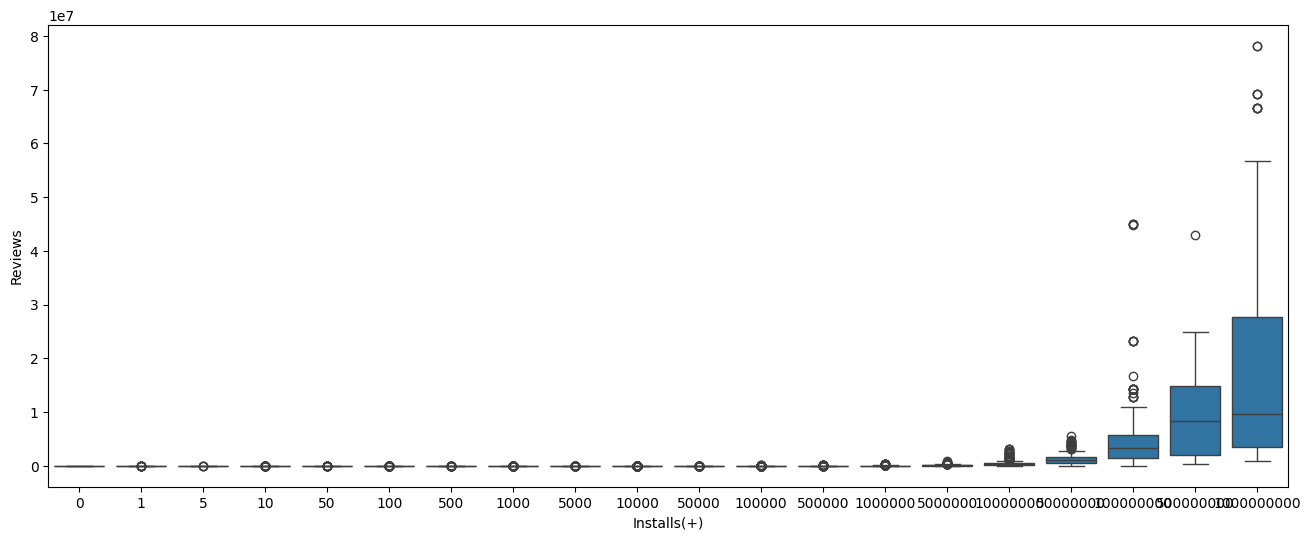

In [48]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs(+)', y= 'Reviews', data=df) # plot the boxplot

> The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs(+)', ylabel='Reviews'>

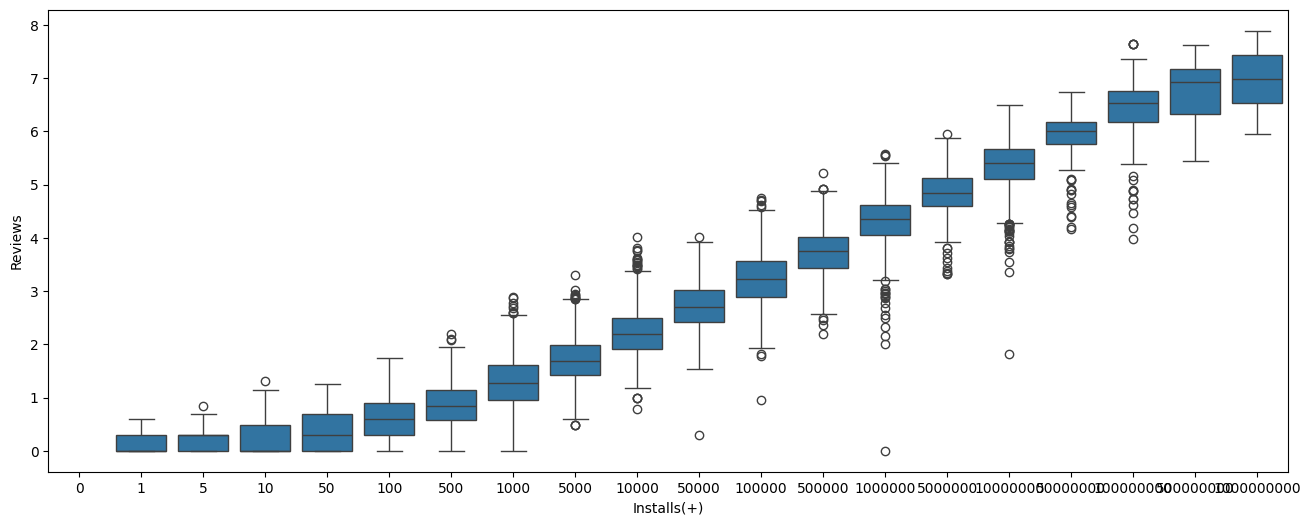

In [50]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs(+)', y= np.log10(df['Reviews']), data=df) # plot the boxplot

> We also draw the scatter plot of the Rating and Review columns with the Installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

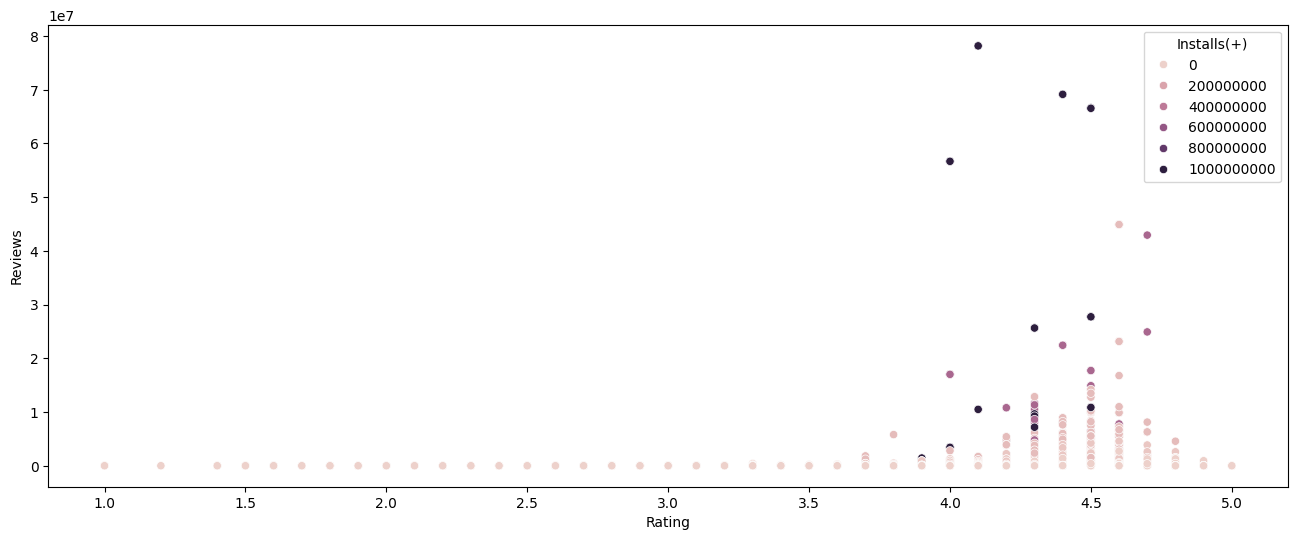

In [52]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs(+)', data=df) # plot the scatter plot

>It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.\
>Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs(+)'>

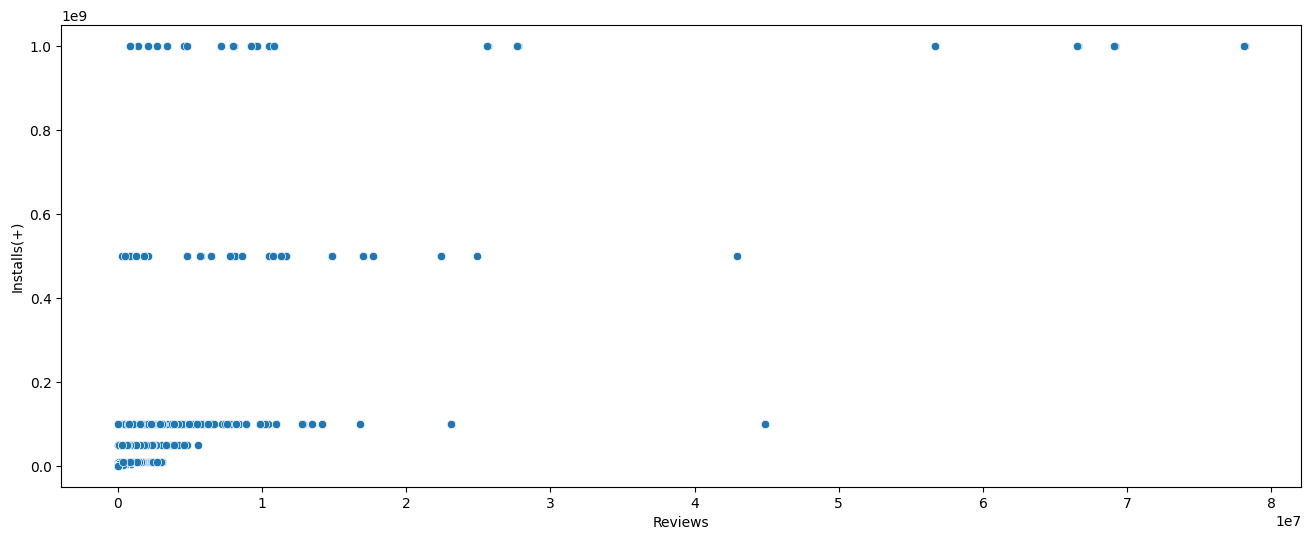

In [53]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs(+)', data=df) # plot the scatter plot

>We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs(+)'>

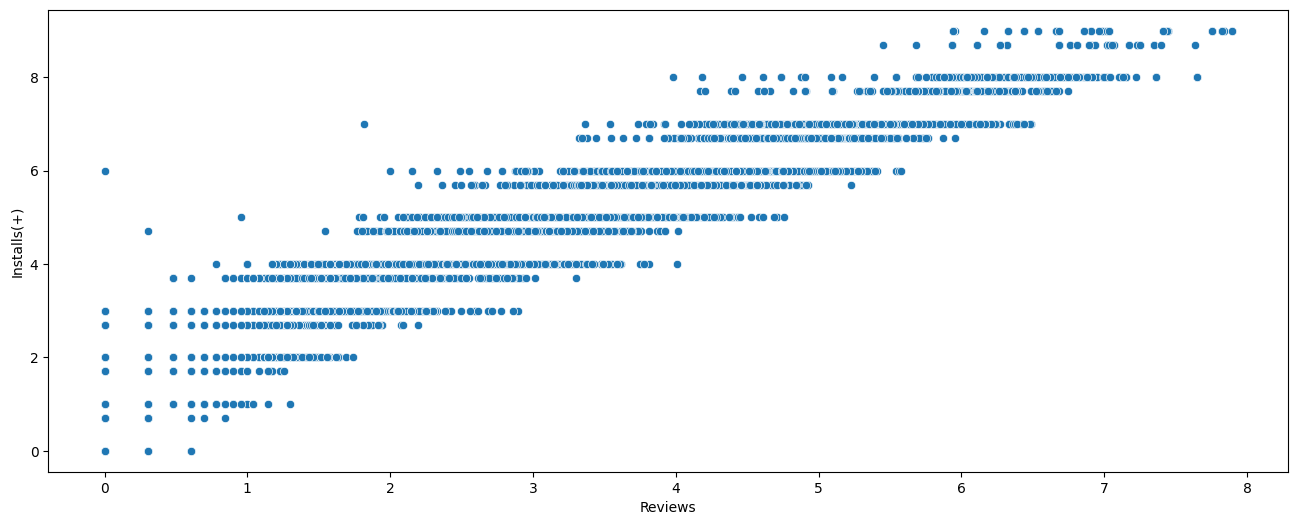

In [55]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs(+)']), data=df) # plot the scatter plot

> Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here.
> 
>  Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

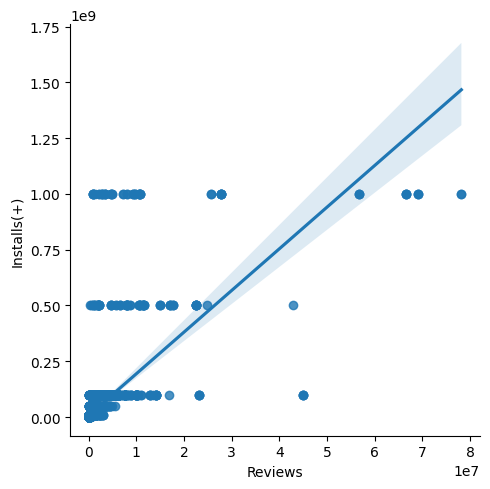

In [57]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs(+)', data=df) # plot the scatter plot with trend line

> Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [58]:
# find duplicate if any
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [59]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [60]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size(MB) column are: 10373
Number of duplicates in Installs(+) column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price($) column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796


In [61]:

# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [ ]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

- I haven't run the above cell because the output is enabled for the 'max' option, so it would take up a lot of space."

- run it to see which are the apps that are duplicated

- Remove Duplicates

In [63]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [64]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**


In [65]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [68]:
# category with highest number of Installs
df.groupby('Category')['Installs(+)'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs(+), dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [69]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **3.4. Which category has the highest rating?**

In [70]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

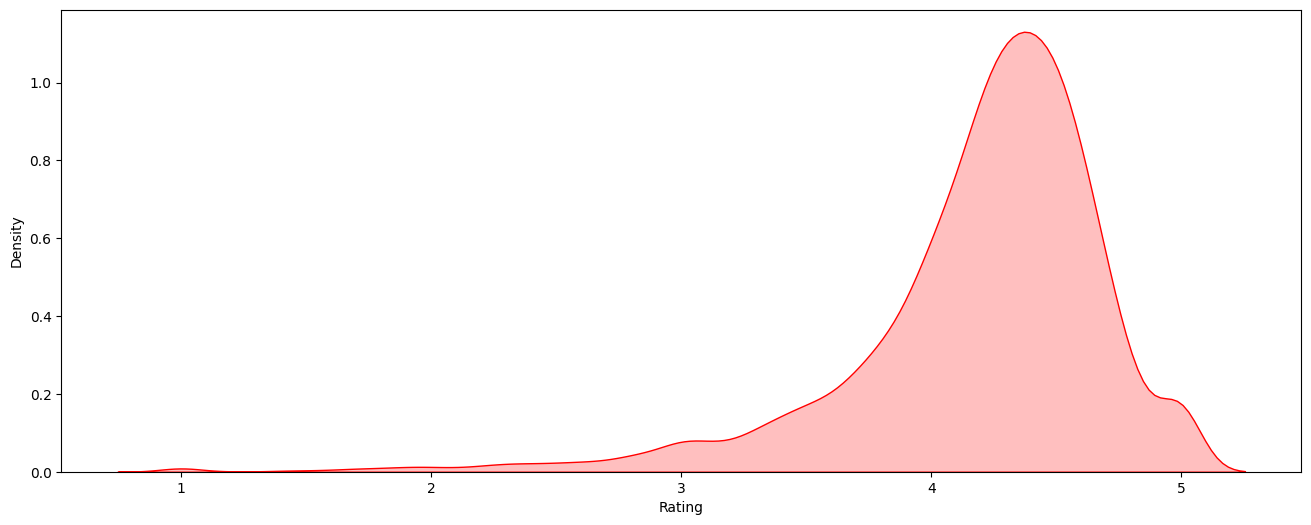

In [72]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="red", shade=True) # plot the distribution plot